#                              LoanTap Linear Regression Model to predict Balance  

## Problem Statement 
### LoanTap aims to leverage a dataset comprising diverse customer attributes to develop a robust predictive model capable of accurately determining the credit rating of customers.

In [276]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [155]:
df = pd.read_csv('Credit.csv')
df.sample(5)

,Unnamed: 0,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance
124,125,29.564,2529,192,1,30,12,Female,No,Yes,Caucasian,0
173,174,14.887,4745,339,3,58,12,Male,No,Yes,African American,724
334,335,24.230,4756,351,2,64,15,Female,No,Yes,Caucasian,594
174,175,121.834,10673,750,3,54,16,Male,No,No,African American,1573
145,146,19.529,4673,341,2,51,14,Male,No,No,Asian,642


## Column Profiling 
Income: The income of the individual.

Limit: The credit limit assigned to the individual.

Rating: The credit rating of the individual.

Cards: The number of credit cards held by the individual.

Age: The age of the individual.

Education: The level of education of the individual.

Gender: The gender of the individual.

Student: Whether the individual is a student or not.

Married: Whether the individual is married or not.

Ethnicity: The ethnicity of the individual.

Balance: The balance (amount owed) on the individual's credit card.

In [156]:
df.shape

(400, 12)

In [157]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  400 non-null    int64  
 1   Income      400 non-null    float64
 2   Limit       400 non-null    int64  
 3   Rating      400 non-null    int64  
 4   Cards       400 non-null    int64  
 5   Age         400 non-null    int64  
 6   Education   400 non-null    int64  
 7   Gender      400 non-null    object 
 8   Student     400 non-null    object 
 9   Married     400 non-null    object 
 10  Ethnicity   400 non-null    object 
 11  Balance     400 non-null    int64  
dtypes: float64(1), int64(7), object(4)
memory usage: 37.6+ KB


In [158]:
df.describe()

,Unnamed: 0,Income,Limit,Rating,Cards,Age,Education,Balance
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,200.500000,45.218885,4735.600000,354.940000,2.957500,55.667500,13.450000,520.015000
std,115.614301,35.244273,2308.198848,154.724143,1.371275,17.249807,3.125207,459.758877
min,1.000000,10.354000,855.000000,93.000000,1.000000,23.000000,5.000000,0.000000
25%,100.750000,21.007250,3088.000000,247.250000,2.000000,41.750000,11.000000,68.750000
50%,200.500000,33.115500,4622.500000,344.000000,3.000000,56.000000,14.000000,459.500000
75%,300.250000,57.470750,5872.750000,437.250000,4.000000,70.000000,16.000000,863.000000
max,400.000000,186.634000,13913.000000,982.000000,9.000000,98.000000,20.000000,1999.000000


In [159]:
df.isnull().sum()

Unnamed: 0    0
Income        0
Limit         0
Rating        0
Cards         0
Age           0
Education     0
Gender        0
Student       0
Married       0
Ethnicity     0
Balance       0
dtype: int64

In [160]:
df.duplicated().sum()

0

In [161]:
df.drop(columns = 'Unnamed: 0', inplace = True)
df.head()

,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance
0,14.891,3606,283,2,34,11,Male,No,Yes,Caucasian,333
1,106.025,6645,483,3,82,15,Female,Yes,Yes,Asian,903
2,104.593,7075,514,4,71,11,Male,No,No,Asian,580
3,148.924,9504,681,3,36,11,Female,No,No,Asian,964
4,55.882,4897,357,2,68,16,Male,No,Yes,Caucasian,331


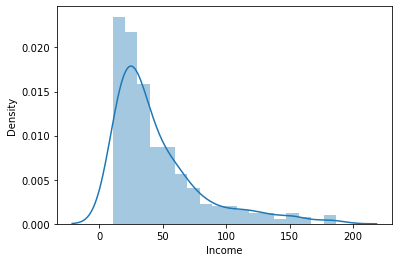

skewed value for Kde plot of Income is 1.7421174049581518


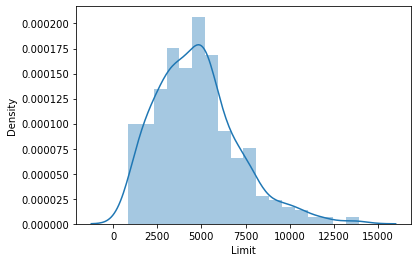

skewed value for Kde plot of Limit is 0.8374929007321962


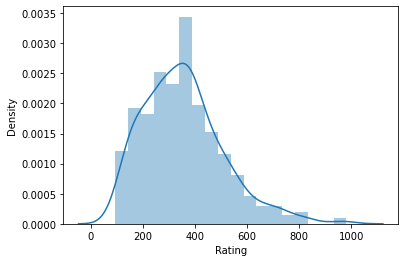

skewed value for Kde plot of Rating is 0.8653935227370102


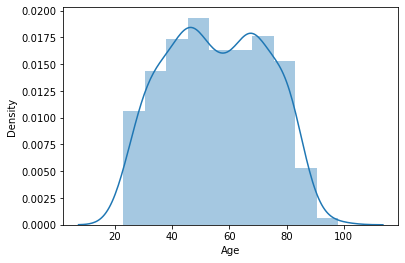

skewed value for Kde plot of Age is 0.011495909415831947


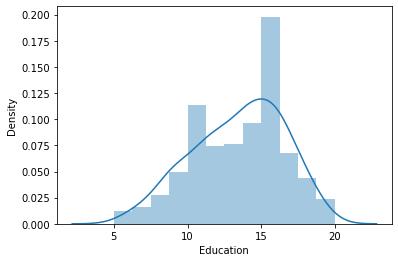

skewed value for Kde plot of Education is -0.32921176090512944


In [162]:
col = ['Income', 'Limit', 'Rating', 'Age','Education']
for i in col:
    sns.distplot(df[i])
    plt.show()
    print("skewed value for Kde plot of",i,"is",df[i].skew())

### Insight
#### from above graphs we can observe that 
1. skewed value for Kde plot of Income is 1.7421174049581518 (which means highly skewed)
2. skewed value for Kde plot of Rating is 0.8653935227370102 and for Limit is 0.8374929007321962 (which means moderatly skewed)

#### Action
Since we are performing linear regression and while performing linear regression, it is generally a good practice to normalize data so further we will apply mathematical transformation over these columns in order to normalize them 

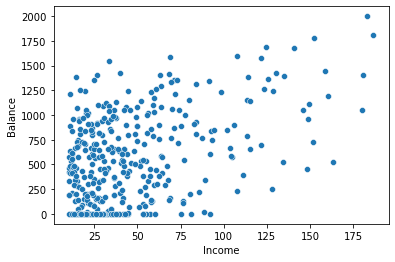

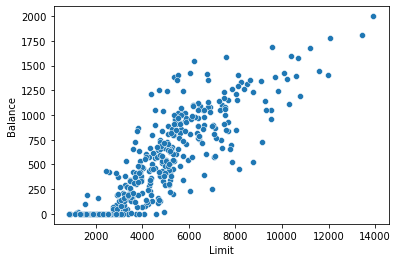

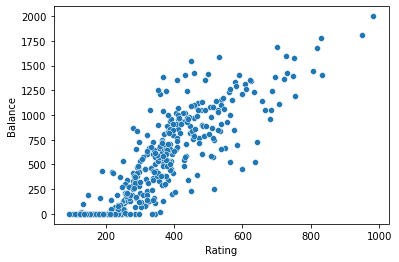

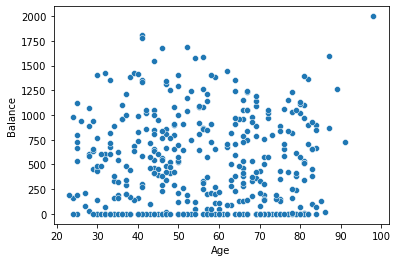

In [163]:
col = ['Income', 'Limit', 'Rating', 'Age']
for i in col:
    sns.scatterplot(df[i],df['Balance'])
    plt.show()

### Insight
#### from above graph following things can be observed 
1. Rating and Limit has a linear relationship with dependable variable Balance 
2. Income has slight linear relationship with dependable variable Balance
3. Age do not posses linear relation with dependable variable Balance

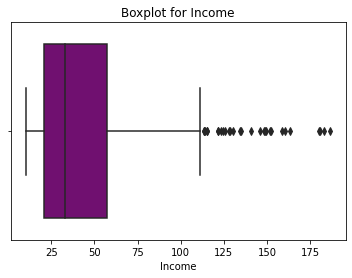

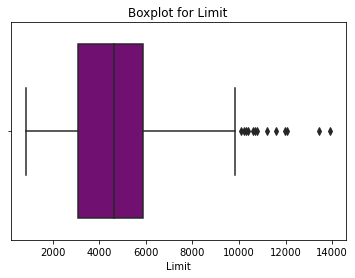

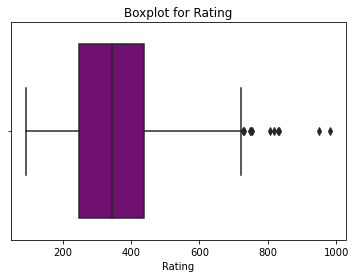

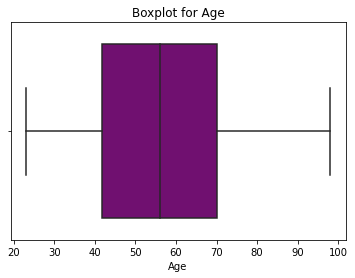

In [164]:
col = ['Income', 'Limit', 'Rating', 'Age']
for i in col:
    sns.boxplot(df[i], color = 'purple')
    plt.title('Boxplot for '+ i)
    plt.show()

### Insight 
#### from above graph we can observe following points 
1. Rating, Limit, Income columns has outliers 
2. Age column is free from outliers 

### Actions 
Since we are performing linear regression and linear regression is sensitive to outliers so going ahead we have to remove these outliers 

## Outliers Treatment
In below cell we are treating outliers in 'Income', 'Limit', 'Rating' and saving those values into new columns 'income', 'limit', 'rating'

In [165]:
cols = ['Income', 'Limit', 'Rating']

for col_name in cols:
    percentile_25 = df[col_name].quantile(0.25)
    percentile_75 = df[col_name].quantile(0.75)

    # Calculate the Interquartile Range (IQR)
    IQR = percentile_75 - percentile_25

    # Define upper and lower bounds for outliers
    upper_bound = percentile_75 + 1.5 * IQR
    lower_bound = percentile_25 - 1.5 * IQR

    # Create new column with outlier-replaced values
    df[col_name.lower()] = df[col_name].apply(lambda x: percentile_75 if x > upper_bound else (percentile_25 if x < lower_bound else x))


### Plotting Boxplot for Income, Limit, Rating (Columns before outliers treatment) and income, limit, rating (Columns after outliers treatment)

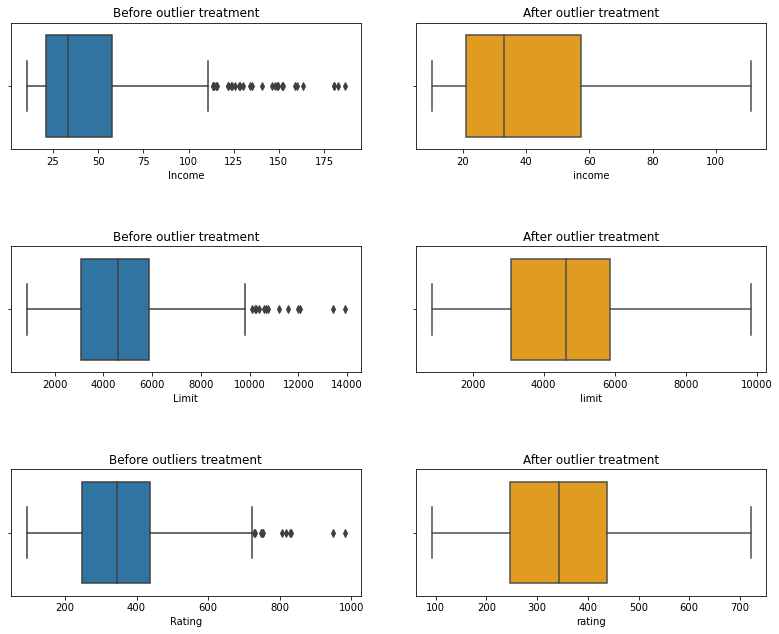

In [166]:
# Create a 3x2 subplot grid
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(12, 10))

# Boxplot for 'Income' and 'income'
sns.boxplot(x=df['Income'], ax=axes[0, 0])
axes[0, 0].set_title('Before outlier treatment')
sns.boxplot(x=df['income'], ax=axes[0, 1], color='orange')
axes[0, 1].set_title('After outlier treatment')

# Boxplot for 'Limit' and 'limit'
sns.boxplot(x=df['Limit'], ax=axes[1, 0])
axes[1, 0].set_title('Before outlier treatment')
sns.boxplot(x=df['limit'], ax=axes[1, 1], color='orange')
axes[1, 1].set_title('After outlier treatment')

# Boxplot for 'Rating' and 'rating'
sns.boxplot(x=df['Rating'], ax=axes[2, 0])
axes[2, 0].set_title('Before outliers treatment')
sns.boxplot(x=df['rating'], ax=axes[2, 1], color='orange')
axes[2, 1].set_title('After outlier treatment')

# Adjust the layout to prevent overlapping titles
plt.tight_layout()

fig.tight_layout(pad=5.0)
# Display the plots
plt.show()


### Since we have our three new columns income, limit, rating so now we are droping old columns as they are of no use 

In [167]:
df.drop(columns = ['Income','Limit','Rating'], inplace = True)
df.head()

,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance,income,limit,rating
0,2,34,11,Male,No,Yes,Caucasian,333,14.89100,3606.0,283.0
1,3,82,15,Female,Yes,Yes,Asian,903,106.02500,6645.0,483.0
2,4,71,11,Male,No,No,Asian,580,104.59300,7075.0,514.0
3,3,36,11,Female,No,No,Asian,964,57.47075,9504.0,681.0
4,2,68,16,Male,No,Yes,Caucasian,331,55.88200,4897.0,357.0


In [168]:
# Define the bin edges for the age groups
bin_edges = [21, 30, 60, 95]  # Bin edges between 21 and 95

# Define the corresponding labels for each bin
bin_labels = ['Young', 'Middle-aged', 'Senior']

# Use pd.cut() to create the bins with descriptive labels
df['Age_Category'] = pd.cut(df['Age'], bins=bin_edges, labels=bin_labels, right=False)

df.head()

,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance,income,limit,rating,Age_Category
0,2,34,11,Male,No,Yes,Caucasian,333,14.89100,3606.0,283.0,Middle-aged
1,3,82,15,Female,Yes,Yes,Asian,903,106.02500,6645.0,483.0,Senior
2,4,71,11,Male,No,No,Asian,580,104.59300,7075.0,514.0,Senior
3,3,36,11,Female,No,No,Asian,964,57.47075,9504.0,681.0,Middle-aged
4,2,68,16,Male,No,Yes,Caucasian,331,55.88200,4897.0,357.0,Senior


In [169]:
# Null Hypothesis: H0:  Age_Category has no impact on Balance
# Alternate Hypothesis: Ha: Age_Category has impact on Balance

from scipy.stats import f_oneway
Age_Category_1 = df[df['Age_Category'] == 'Young']['Balance'].values
Age_Category_2 = df[df['Age_Category'] == 'Middle-aged']['Balance'].values
Age_Category_3 = df[df['Age_Category'] == 'Senior']['Balance'].values

alpha = 0.05
f_stat,p_value = f_oneway(Age_Category_1,Age_Category_2,Age_Category_3)
print('p_value is',p_value)
if p_value < alpha:
    print('we reject Null Hypothesis H0')
else:
    print('Failed to reject Null Hypothesis H0')

p_value is 0.29572379902439716
Failed to reject Null Hypothesis H0


### Insight
#### while performing Anova test for diffrent age categories we found that Balance mean is not significantly different for different age categories hence Age is not having major impact over our dependant variable 

In [170]:
df['Cards'].value_counts()

2    115
3    111
4     72
1     51
5     34
6     11
7      4
8      1
9      1
Name: Cards, dtype: int64

### Insight 
from above code we can observe that alomst 200 people in our dataset having either 1 or 2 cards and rest having more than 2 cards

### Action 
Since we wanna see impact of no. of cards so we will categorise it into two bins no of cards equal to (1 & 2) into one group and rest into other

In [171]:
def fun(x):
    if x == 1 or x == 2:
        return '1-2'
    else:
        return '2+'
df["num_of_cards"] = df['Cards'].apply(fun)

In [172]:
# Checking number of cards has any impact on dependant variable Balance or not (Checking at 95% confidence or alpha = 0.05) 
# using two sample t-test
 
# Null Hypothesis: H0 is number of cards has no impact on dependant variable Balance
# Alternate Hypothesis: Ha is number of cards has impact on dependant variable Balance

import scipy.stats as stat
alpha = 0.05
card_count_upto_2 = df[df["num_of_cards"] == '1-2']['Balance'].values
card_count_more_than_2 = df[df["num_of_cards"] == '2+']['Balance'].values

t_stat,p_value = stat.ttest_ind(card_count_upto_2, card_count_more_than_2)
print('p_value is',p_value)
if p_value < alpha:
    print('we reject Null Hypothesis H0')
else:
    print('Failed to reject Null Hypothesis H0')

p_value is 0.28561062054743463
Failed to reject Null Hypothesis H0


### Insight
#### while performing two sample t-test for different number of cards we found that Balance mean is not significantly different for different values of number of card hence Cards is not having major impact over our dependant variable 

In [173]:
# Checking Gender has any impact on dependant variable Balance or not (Checking at 95% confidence or alpha = 0.05) 
# using two sample t-test
 
# Null Hypothesis: H0 is Gender has no impact on dependant variable Balance
# Alternate Hypothesis: Ha is Gender has impact on dependant variable Balance

import scipy.stats as stat
alpha = 0.05
Gender_male = df[df["Gender"] == ' Male']['Balance'].values
Gender_female = df[df["Gender"] == 'Female']['Balance'].values

t_stat,p_value = stat.ttest_ind(Gender_male, Gender_female)
print('p_value is',p_value)
if p_value < alpha:
    print('we reject Null Hypothesis H0')
else:
    print('Failed to reject Null Hypothesis H0')

p_value is 0.6685161055027189
Failed to reject Null Hypothesis H0


### Insight
#### while performing two sample t-test for different Gender we found that Balance mean is not significantly different for different Gender hence Gender is not having major impact over our dependant variable 

In [174]:
# Checking Marital Status has any impact on dependant variable Balance or not (Checking at 95% confidence or alpha = 0.05) 
# using two sample t-test
 
# Null Hypothesis: H0 is Marital Status has no impact on dependant variable Balance
# Alternate Hypothesis: Ha is Marital Status has impact on dependant variable Balance

import scipy.stats as stat
alpha = 0.05
Married_Yes = df[df["Married"] == 'Yes']['Balance'].values
Married_No = df[df["Married"] == 'No']['Balance'].values

t_stat,p_value = stat.ttest_ind(Married_Yes, Married_No)
print('p_value is',p_value)
if p_value < alpha:
    print('we reject Null Hypothesis H0')
else:
    print('Failed to reject Null Hypothesis H0')

p_value is 0.9099388989450072
Failed to reject Null Hypothesis H0


### Insight
#### while performing two sample t-test for different Marital Status we found that Balance mean is not significantly different for different Marital Status hence Married Featue is not having major impact over our dependant variable 

In [175]:
# Checking Student Status has any impact on dependant variable Balance or not (Checking at 95% confidence or alpha = 0.05) 
# using two sample t-test
 
# Null Hypothesis: H0 is Student Status has no impact on dependant variable Balance
# Alternate Hypothesis: Ha is Student Status has impact on dependant variable Balance

import scipy.stats as stat
alpha = 0.05
Student_Yes = df[df["Student"] == 'Yes']['Balance'].values
Student_No = df[df["Student"] == 'No']['Balance'].values

t_stat,p_value = stat.ttest_ind(Student_Yes, Student_No)
print('p_value is',p_value)
if p_value < alpha:
    print('we reject Null Hypothesis H0')
else:
    print('Failed to reject Null Hypothesis H0')

p_value is 1.4877341077323024e-07
we reject Null Hypothesis H0


### Insight
#### while performing two sample t-test for different Student Status we found that Balance mean is significantly different for different Student Status hence Student Featue is having major impact over our dependant variable 

In [176]:
# Null Hypothesis: H0:  Ethnicity has no impact on Balance
# Alternate Hypothesis: Ha: Ethnicity has impact on Balance

from scipy.stats import f_oneway
Ethnicity_1 = df[df['Ethnicity'] == 'Caucasian']['Balance'].values
Ethnicity_2 = df[df['Ethnicity'] == 'Asian']['Balance'].values
Ethnicity_3 = df[df['Ethnicity'] == 'African American']['Balance'].values

alpha = 0.05
f_stat,p_value = f_oneway(Ethnicity_1,Ethnicity_2,Ethnicity_3)
print('p_value is',p_value)
if p_value < alpha:
    print('we reject Null Hypothesis H0')
else:
    print('Failed to reject Null Hypothesis H0')

p_value is 0.9574918881199579
Failed to reject Null Hypothesis H0


### Insight
#### while performing Anova test for different Ethnic groups we found that Balance mean is not significantly different for different Ethnicic group hence Ethnicity is not having major impact over our dependant variable 

In [177]:
# Define the custom bin edges for the education groups
bin_edges = [5, 9, 12, 15, 20]

# Define the corresponding labels for each bin
bin_labels = ['Low', 'Moderate', 'High', 'Very High']

# Use pd.cut() to create the bins with descriptive labels
df['Education_Category'] = pd.cut(df['Education'], bins=bin_edges, labels=bin_labels, right=False)

# Print the DataFrame with the new 'Education_Category' column
df.head()

,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance,income,limit,rating,Age_Category,num_of_cards,Education_Category
0,2,34,11,Male,No,Yes,Caucasian,333,14.89100,3606.0,283.0,Middle-aged,1-2,Moderate
1,3,82,15,Female,Yes,Yes,Asian,903,106.02500,6645.0,483.0,Senior,2+,Very High
2,4,71,11,Male,No,No,Asian,580,104.59300,7075.0,514.0,Senior,2+,Moderate
3,3,36,11,Female,No,No,Asian,964,57.47075,9504.0,681.0,Middle-aged,2+,Moderate
4,2,68,16,Male,No,Yes,Caucasian,331,55.88200,4897.0,357.0,Senior,1-2,Very High


In [178]:
from scipy.stats import f_oneway

Education_Category_1 = df[df['Education_Category'] == 'Low']['Balance'].values
Education_Category_2 = df[df['Education_Category'] == 'Moderate']['Balance'].values
Education_Category_3 = df[df['Education_Category'] == 'High']['Balance'].values
Education_Category_4 = df[df['Education_Category'] == 'Very High']['Balance'].values

alpha = 0.05
f_stat, p_value = f_oneway(Education_Category_1, Education_Category_2, Education_Category_3,Education_Category_4)
print('p_value is', p_value)
if p_value < alpha:
    print('we reject Null Hypothesis H0')
else:
    print('Failed to reject Null Hypothesis H0')

p_value is 0.8922500395636683
Failed to reject Null Hypothesis H0


### Insight
#### while performing Anova test for different Education_Category we found that Balance mean is not significantly different for different Education_Category hence Education is not having major impact over our dependant variable 

In [179]:
df.head()

,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance,income,limit,rating,Age_Category,num_of_cards,Education_Category
0,2,34,11,Male,No,Yes,Caucasian,333,14.89100,3606.0,283.0,Middle-aged,1-2,Moderate
1,3,82,15,Female,Yes,Yes,Asian,903,106.02500,6645.0,483.0,Senior,2+,Very High
2,4,71,11,Male,No,No,Asian,580,104.59300,7075.0,514.0,Senior,2+,Moderate
3,3,36,11,Female,No,No,Asian,964,57.47075,9504.0,681.0,Middle-aged,2+,Moderate
4,2,68,16,Male,No,Yes,Caucasian,331,55.88200,4897.0,357.0,Senior,1-2,Very High


### we can observe few new columns in above dataframe which we had created for better understanding of corresponding numerical column and also for performing some statsitical on those numerical columns 

### Action 
as we are performing Linear Regression so columns with two many categorical values will create complexity and since we already have used these column to gather insights now we can simply drop them.

In [180]:
df.drop(columns = ['Age_Category', 'num_of_cards', 'Education_Category'], inplace = True)
df.head()

,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance,income,limit,rating
0,2,34,11,Male,No,Yes,Caucasian,333,14.89100,3606.0,283.0
1,3,82,15,Female,Yes,Yes,Asian,903,106.02500,6645.0,483.0
2,4,71,11,Male,No,No,Asian,580,104.59300,7075.0,514.0
3,3,36,11,Female,No,No,Asian,964,57.47075,9504.0,681.0
4,2,68,16,Male,No,Yes,Caucasian,331,55.88200,4897.0,357.0


### above in one of cells we have seen through our visualization that distplots of Income, Limit, Rating were right skewed and also contained outliers but we have already done outliers treatment and removed columns which had outliers so we shpuld again plot histogram of these new column to analyse are they still skewed or not

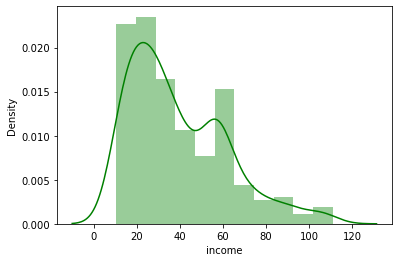

skewed value for Kde plot of income is 0.9176170483343995


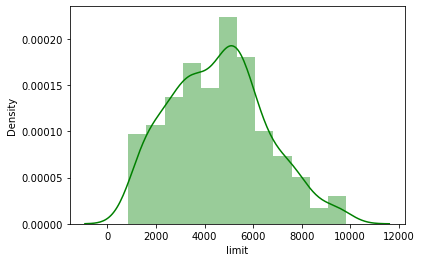

skewed value for Kde plot of limit is 0.2786725472818347


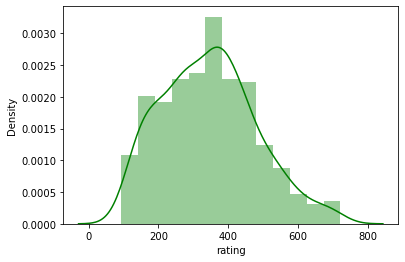

skewed value for Kde plot of rating is 0.3633619730491769


In [181]:
new_col = ['income','limit','rating']
for i in new_col:
    sns.distplot(df[i], color = 'green')
    plt.show()
    print("skewed value for Kde plot of",i,"is",df[i].skew())

### Insight
from above visualization we can see that limit and rating are no more skewed now , only graph which is still skewed is income 

### Action 
now we will apply transformation over this column only

skewed value for Kde plot of income is  0.9176170483343995
skewed value for Kde plot of Income is  -0.08974321388627296


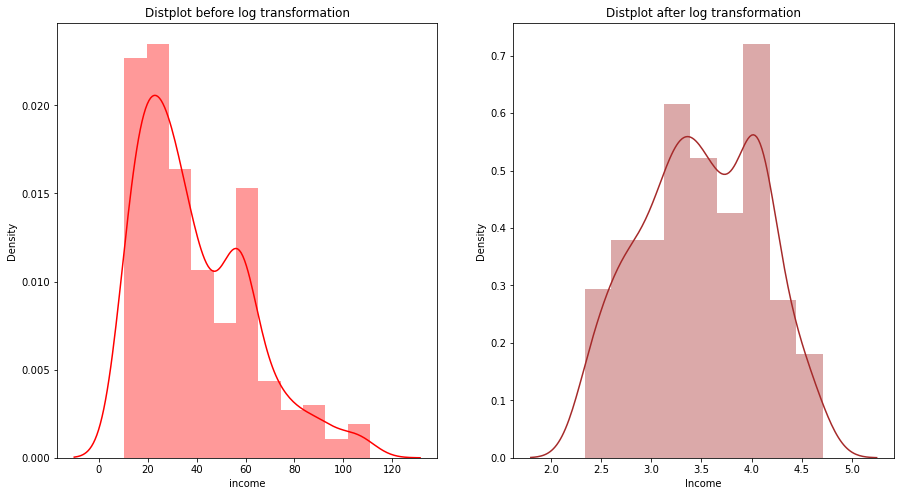

In [182]:
df['Income'] = np.log(df['income'])

plt.figure(figsize=(15, 8))
plt.subplot(1, 2, 1)
sns.distplot(df['income'], color='red')
plt.title('Distplot before log transformation')
print('skewed value for Kde plot of income is ', df['income'].skew())  # Corrected the skewness calculation

plt.subplot(1, 2, 2)
sns.distplot(df['Income'], color='brown')
plt.title('Distplot after log transformation')
print('skewed value for Kde plot of Income is ', df['Income'].skew())  # Corrected the skewness calculation

plt.show()

### from above chart we can see that Income is normally distributed now

Converting binary coulmns e.g {'Gender', 'Married', 'Student'} into 0 and 1 

In [183]:
df['Gender'].replace({' Male': 1, 'Female': 0}, inplace=True)
df['Student'].replace({'Yes': 1, 'No': 0}, inplace=True)
df['Married'].replace({'Yes': 1, 'No': 0}, inplace=True)

# Print the DataFrame with binary categorical columns converted to 0 and 1
df.head()

,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance,income,limit,rating,Income
0,2,34,11,1,0,1,Caucasian,333,14.89100,3606.0,283.0,2.700757
1,3,82,15,0,1,1,Asian,903,106.02500,6645.0,483.0,4.663675
2,4,71,11,1,0,0,Asian,580,104.59300,7075.0,514.0,4.650077
3,3,36,11,0,0,0,Asian,964,57.47075,9504.0,681.0,4.051276
4,2,68,16,1,0,1,Caucasian,331,55.88200,4897.0,357.0,4.023242


In [184]:
from sklearn.preprocessing import OneHotEncoder

# Create an instance of the OneHotEncoder class
encoder = OneHotEncoder()

# Specify the column(s) to be one-hot encoded
columns_to_encode = ['Ethnicity']

# Fit and transform the selected column(s) with one-hot encoding
one_hot_encoded_data = encoder.fit_transform(df[columns_to_encode])

# Convert the sparse matrix to a DataFrame
df_encoded = pd.DataFrame(one_hot_encoded_data.toarray(), columns=encoder.get_feature_names(columns_to_encode))

# Concatenate the encoded DataFrame with the original DataFrame (excluding the columns to be encoded)
df_encoded = pd.concat([df.drop(columns=columns_to_encode), df_encoded], axis=1)

# Print the DataFrame with one-hot encoded columns
df_encoded.head()

,Cards,Age,Education,Gender,Student,Married,Balance,income,limit,rating,Income,Ethnicity_African American,Ethnicity_Asian,Ethnicity_Caucasian
0,2,34,11,1,0,1,333,14.89100,3606.0,283.0,2.700757,0.0,0.0,1.0
1,3,82,15,0,1,1,903,106.02500,6645.0,483.0,4.663675,0.0,1.0,0.0
2,4,71,11,1,0,0,580,104.59300,7075.0,514.0,4.650077,0.0,1.0,0.0
3,3,36,11,0,0,0,964,57.47075,9504.0,681.0,4.051276,0.0,1.0,0.0
4,2,68,16,1,0,1,331,55.88200,4897.0,357.0,4.023242,0.0,0.0,1.0


### Observation
in above dataframe we can see that our dependant variable 'Balance' is in between other feature while for better visualization it should be at last index 

### Action 
we will rearange column order for better visualization

In [185]:
neworder = ['Cards', 'Age', 'Education', 'Gender', 'Student', 'Married',
       'Income', 'limit', 'rating', 'Ethnicity_African American',
       'Ethnicity_Asian', 'Ethnicity_Caucasian','Balance']

df_encoded=df_encoded.reindex(columns=neworder)

df_encoded.head()

,Cards,Age,Education,Gender,Student,Married,Income,limit,rating,Ethnicity_African American,Ethnicity_Asian,Ethnicity_Caucasian,Balance
0,2,34,11,1,0,1,2.700757,3606.0,283.0,0.0,0.0,1.0,333
1,3,82,15,0,1,1,4.663675,6645.0,483.0,0.0,1.0,0.0,903
2,4,71,11,1,0,0,4.650077,7075.0,514.0,0.0,1.0,0.0,580
3,3,36,11,0,0,0,4.051276,9504.0,681.0,0.0,1.0,0.0,964
4,2,68,16,1,0,1,4.023242,4897.0,357.0,0.0,0.0,1.0,331


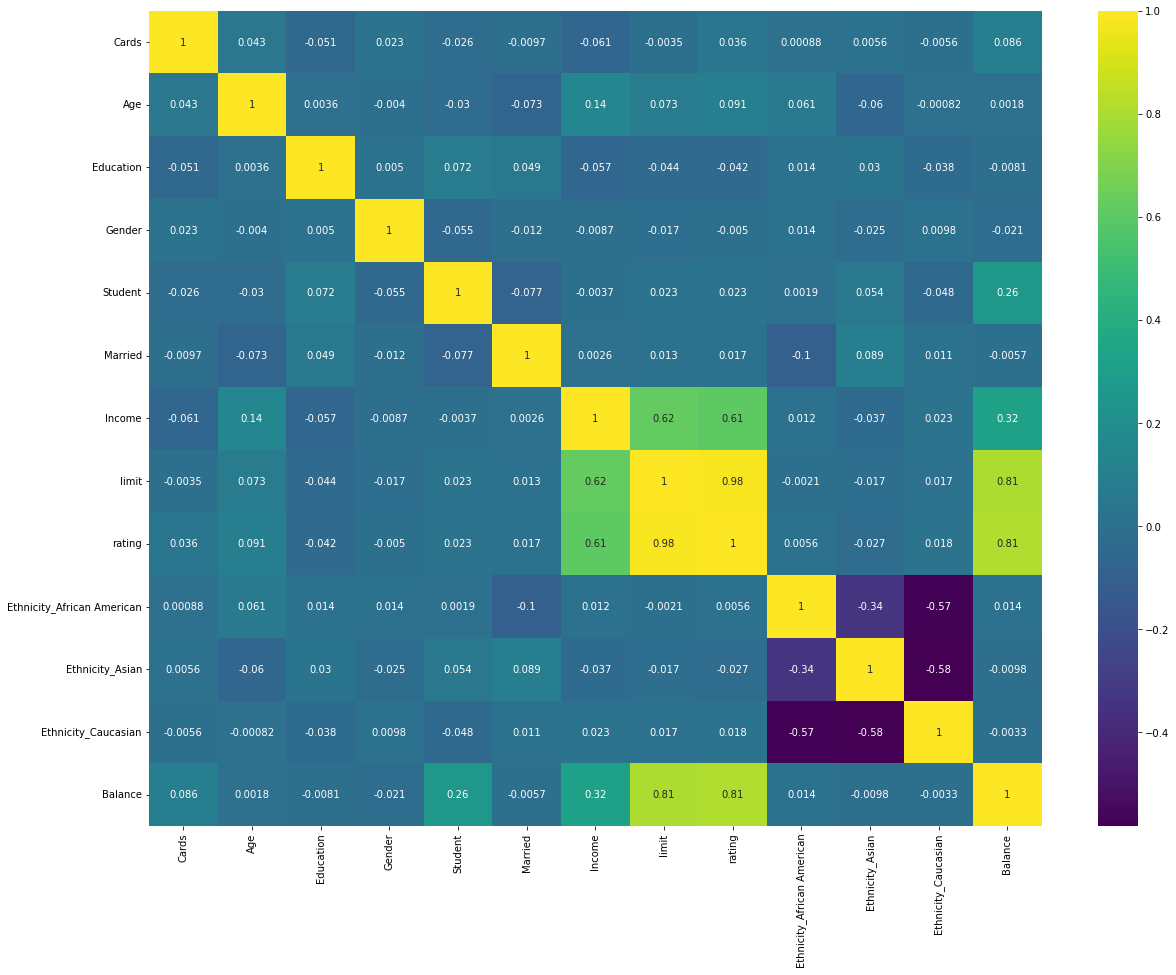

In [186]:
plt.figure(figsize=(20, 15))
sns.heatmap(df_encoded.corr(), annot=True, cmap='viridis')
plt.show()

### Model - 1
#### Defining our dependent and independent variables

In [187]:
X = df_encoded[['Cards', 'Age', 'Education', 'Gender', 'Student', 'Married',
       'Income', 'limit', 'rating', 'Ethnicity_African American',
       'Ethnicity_Asian', 'Ethnicity_Caucasian']]

y = df_encoded['Balance']

### Splitting X and y into train, test and validation dataset

In [188]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

### Scaling numerical features except those which are already in form of 0 and 1 

In [189]:
from sklearn.preprocessing import StandardScaler

# Identify the binary columns and numerical columns
binary_columns = ['Gender', 'Student', 'Married', 'Ethnicity_African_American', 'Ethnicity_Asian', 'Ethnicity_Caucasian']
numerical_columns = [col for col in X_train.columns if col not in binary_columns]

# Create a StandardScaler object
scaler = StandardScaler()

# Fit the scaler on the training data for the numerical columns and transform it
X_train_scaled = X_train.copy()
X_train_scaled[numerical_columns] = scaler.fit_transform(X_train[numerical_columns])


X_test_scaled = X_test.copy()
X_test_scaled[numerical_columns] = scaler.transform(X_test[numerical_columns])

# Now, X_train_scaled, X_val_scaled, and X_test_scaled contain the scaled numerical features,
# and the binary columns remain unchanged

In [190]:
X_train_scaled

,Cards,Age,Education,Gender,Student,Married,Income,limit,rating,Ethnicity_African American,Ethnicity_Asian,Ethnicity_Caucasian
3,0.047314,-1.215921,-0.794032,0,0,0,0.951803,2.490674,2.464646,-0.582162,1.0,0.0
18,-1.394629,-1.688912,-1.426098,0,0,1,0.698426,0.932697,0.768366,-0.582162,1.0,0.0
202,-0.673658,0.084806,-0.161967,0,0,1,-0.769943,-1.532103,-1.437527,-0.582162,0.0,1.0
250,-0.673658,-0.565557,1.418197,0,0,1,-1.983092,-1.041740,-1.102639,-0.582162,1.0,0.0
274,1.489256,1.444656,-1.426098,0,0,0,-0.130834,0.675531,0.702844,1.717736,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
71,-0.673658,1.444656,-0.478000,0,0,1,0.990424,1.441037,1.423581,-0.582162,1.0,0.0
106,-0.673658,1.030789,0.470099,1,0,1,-1.153410,-1.587531,-1.655933,-0.582162,1.0,0.0
270,-1.394629,-1.038549,-0.161967,1,0,0,-1.253347,-0.714664,-0.913355,-0.582162,0.0,1.0
348,0.047314,0.794293,0.154066,1,0,1,-1.538545,-1.688899,-1.677773,-0.582162,0.0,1.0


### Training our Linear Regression model

In [191]:
import statsmodels.api as sm

# Add a constant column to the scaled training data
X_train_scaled_const = sm.add_constant(X_train_scaled)

# Create and fit the linear regression model using OLS (Ordinary Least Squares)
model = sm.OLS(y_train, X_train_scaled_const)
results = model.fit()

# Print the summary of the model
print(results.summary())

# Add a constant column to the scaled test data
X_test_scaled_const = sm.add_constant(X_test_scaled)

# Make predictions on test data using the fitted model
y_test_pred = results.predict(X_test_scaled_const)

                            OLS Regression Results                            
Dep. Variable:                Balance   R-squared:                       0.772
Model:                            OLS   Adj. R-squared:                  0.764
Method:                 Least Squares   F-statistic:                     94.99
Date:                Sun, 30 Jul 2023   Prob (F-statistic):           4.77e-92
Time:                        12:44:51   Log-Likelihood:                -2186.8
No. Observations:                 320   AIC:                             4398.
Df Residuals:                     308   BIC:                             4443.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

### Checking model performance metrics on Training, validation and Test data

In [192]:
from sklearn.metrics import mean_squared_error, r2_score

# Calculate metrics for each model
def evaluate_model(y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)
    return mse, rmse, r2

# Evaluate the training set
y_train_pred = results.predict(X_train_scaled_const)
train_mse, train_rmse, train_r2 = evaluate_model(y_train, y_train_pred)

# Evaluate the test set
y_test_pred = results.predict(X_test_scaled_const)
test_mse, test_rmse, test_r2 = evaluate_model(y_test, y_test_pred)

# Print the results
print("Training Set:")
print(f"MSE: {train_mse:.2f}, RMSE: {train_rmse:.2f}, R-squared: {train_r2:.2f}")

print("\nTest Set:")
print(f"MSE: {test_mse:.2f}, RMSE: {test_rmse:.2f}, R-squared: {test_r2:.2f}")


Training Set:
MSE: 50490.21, RMSE: 224.70, R-squared: 0.77

Test Set:
MSE: 42391.99, RMSE: 205.89, R-squared: 0.75


### Checking VIF values for each feature for Better understanding of multicolinearity between Features 

In [193]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_data = pd.DataFrame()
vif_data['Feature'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i)
                   for i in range(X.shape[1])]

print(vif_data)

                       Feature        VIF
0                        Cards   1.067844
1                          Age   1.045684
2                    Education   1.016526
3                       Gender   1.008554
4                      Student   1.021954
5                      Married   1.030861
6                       Income   1.656307
7                        limit  36.190627
8                       rating  35.878479
9   Ethnicity_African American  19.750773
10             Ethnicity_Asian  20.003000
11         Ethnicity_Caucasian  38.255280


### Model - 2
### Re-defining X and y after removing few features with high VIF values 

In [194]:
X = df_encoded[['Cards', 'Age', 'Education', 'Gender', 'Student', 'Married',
       'Income', 'limit', 'rating', 'Ethnicity_African American',
       'Ethnicity_Asian']]

y = df_encoded['Balance']

### Performing train test split on X and y

In [195]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

### Scaling Features in X_train and X_test data using Standard scaler

In [196]:
from sklearn.preprocessing import StandardScaler

# Identify the binary columns and numerical columns
binary_columns = ['Gender', 'Student', 'Married', 'Ethnicity_African_American', 'Ethnicity_Asian', 'Ethnicity_Caucasian']
numerical_columns = [col for col in X_train.columns if col not in binary_columns]

# Create a StandardScaler object
scaler = StandardScaler()

# Fit the scaler on the training data for the numerical columns and transform it
X_train_scaled = X_train.copy()
X_train_scaled[numerical_columns] = scaler.fit_transform(X_train[numerical_columns])

X_test_scaled = X_test.copy()
X_test_scaled[numerical_columns] = scaler.transform(X_test[numerical_columns])

# Now, X_train_scaled, X_val_scaled, and X_test_scaled contain the scaled numerical features,
# and the binary columns remain unchanged

### Training Model using OLS method

In [197]:
import statsmodels.api as sm

# Add a constant column to the scaled training data
X_train_scaled_const = sm.add_constant(X_train_scaled)

# Create and fit the linear regression model using OLS (Ordinary Least Squares)
model = sm.OLS(y_train, X_train_scaled_const)
results = model.fit()

# Print the summary of the model
print(results.summary())

# Add a constant column to the scaled test data
X_test_scaled_const = sm.add_constant(X_test_scaled)

# Make predictions on test data using the fitted model
y_test_pred = results.predict(X_test_scaled_const)

                            OLS Regression Results                            
Dep. Variable:                Balance   R-squared:                       0.772
Model:                            OLS   Adj. R-squared:                  0.764
Method:                 Least Squares   F-statistic:                     94.99
Date:                Sun, 30 Jul 2023   Prob (F-statistic):           4.77e-92
Time:                        12:44:52   Log-Likelihood:                -2186.8
No. Observations:                 320   AIC:                             4398.
Df Residuals:                     308   BIC:                             4443.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

### Checking performance metrics on Train , Test and validation data

In [198]:
from sklearn.metrics import mean_squared_error, r2_score

# Calculate metrics for each model
def evaluate_model(y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)
    return mse, rmse, r2

# Evaluate the training set
y_train_pred = results.predict(X_train_scaled_const)
train_mse, train_rmse, train_r2 = evaluate_model(y_train, y_train_pred)

# Evaluate the test set
y_test_pred = results.predict(X_test_scaled_const)
test_mse, test_rmse, test_r2 = evaluate_model(y_test, y_test_pred)

# Print the results
print("Training Set:")
print(f"MSE: {train_mse:.2f}, RMSE: {train_rmse:.2f}, R-squared: {train_r2:.2f}")

print("\nTest Set:")
print(f"MSE: {test_mse:.2f}, RMSE: {test_rmse:.2f}, R-squared: {test_r2:.2f}")


Training Set:
MSE: 50490.21, RMSE: 224.70, R-squared: 0.77

Test Set:
MSE: 42391.99, RMSE: 205.89, R-squared: 0.75


### Checking VIF values for each feature for Better understanding of multicolinearity between Features 

In [199]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Assuming you have a DataFrame `X` containing your predictor variables

vif_data = pd.DataFrame()
vif_data['Feature'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i)
                   for i in range(X.shape[1])]

print(vif_data)

                       Feature         VIF
0                        Cards    5.552901
1                          Age   11.204489
2                    Education   14.436909
3                       Gender    1.927292
4                      Student    1.134179
5                      Married    2.608788
6                       Income   34.010884
7                        limit  227.689612
8                       rating  270.644276
9   Ethnicity_African American    1.503261
10             Ethnicity_Asian    1.515290


### Model - 3
#### Re-defining X and y after removing those features with high VIF

In [200]:
X = df_encoded[['Cards', 'Age', 'Education', 'Gender', 'Student', 'Married',
       'Income', 'limit', 'Ethnicity_African American',
       'Ethnicity_Asian']]

y = df_encoded['Balance']

In [201]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [202]:
from sklearn.preprocessing import StandardScaler

# Identify the binary columns and numerical columns
binary_columns = ['Gender', 'Student', 'Married', 'Ethnicity_African_American', 'Ethnicity_Asian', 'Ethnicity_Caucasian']
numerical_columns = [col for col in X_train.columns if col not in binary_columns]

# Create a StandardScaler object
scaler = StandardScaler()

# Fit the scaler on the training data for the numerical columns and transform it
X_train_scaled = X_train.copy()
X_train_scaled[numerical_columns] = scaler.fit_transform(X_train[numerical_columns])


X_test_scaled = X_test.copy()
X_test_scaled[numerical_columns] = scaler.transform(X_test[numerical_columns])

# Now, X_train_scaled, X_val_scaled, and X_test_scaled contain the scaled numerical features,
# and the binary columns remain unchanged

In [203]:
import statsmodels.api as sm

# Add a constant column to the scaled training data
X_train_scaled_const = sm.add_constant(X_train_scaled)

# Create and fit the linear regression model using OLS (Ordinary Least Squares)
model = sm.OLS(y_train, X_train_scaled_const)
results = model.fit()

# Print the summary of the model
print(results.summary())

# Add a constant column to the scaled test data
X_test_scaled_const = sm.add_constant(X_test_scaled)

# Make predictions on test data using the fitted model
y_test_pred = results.predict(X_test_scaled_const)

                            OLS Regression Results                            
Dep. Variable:                Balance   R-squared:                       0.763
Model:                            OLS   Adj. R-squared:                  0.756
Method:                 Least Squares   F-statistic:                     99.62
Date:                Sun, 30 Jul 2023   Prob (F-statistic):           1.83e-90
Time:                        12:44:58   Log-Likelihood:                -2193.1
No. Observations:                 320   AIC:                             4408.
Df Residuals:                     309   BIC:                             4450.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

In [204]:
from sklearn.metrics import mean_squared_error, r2_score

# Calculate metrics for each model
def evaluate_model(y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)
    return mse, rmse, r2

# Evaluate the training set
y_train_pred = results.predict(X_train_scaled_const)
train_mse, train_rmse, train_r2 = evaluate_model(y_train, y_train_pred)

# Evaluate the test set
y_test_pred = results.predict(X_test_scaled_const)
test_mse, test_rmse, test_r2 = evaluate_model(y_test, y_test_pred)

# Print the results
print("Training Set:")
print(f"MSE: {train_mse:.2f}, RMSE: {train_rmse:.2f}, R-squared: {train_r2:.2f}")

print("\nTest Set:")
print(f"MSE: {test_mse:.2f}, RMSE: {test_rmse:.2f}, R-squared: {test_r2:.2f}")

Training Set:
MSE: 52506.55, RMSE: 229.14, R-squared: 0.76

Test Set:
MSE: 43603.82, RMSE: 208.82, R-squared: 0.74


In [205]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Assuming you have a DataFrame `X` containing your predictor variables

vif_data = pd.DataFrame()
vif_data['Feature'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i)
                   for i in range(X.shape[1])]

print(vif_data)

                      Feature        VIF
0                       Cards   5.182202
1                         Age  11.039159
2                   Education  14.381148
3                      Gender   1.917906
4                     Student   1.133574
5                     Married   2.602830
6                      Income  33.783913
7                       limit   9.925266
8  Ethnicity_African American   1.501917
9             Ethnicity_Asian   1.513183


### Insight 
1. we can observe that accuracy remains constant betweeb model-1 and model-2 while it is reducing when going from model-2 to model three but model-2 having 2 features with VIF values of more than 220 while for model-1 VIF values for those features were 38 
2. when we try to eliminate more features of high VIF values model accuracy started reducing

### Action 
we are finalising model-1 as our final model since it has more number of features and less features having VIF value greater than 5

## Final Model (which is Model-1 only)
### defining X and Y

In [258]:
X = df_encoded[['Cards','Age', 'Education',
       'Income', 'limit', 'rating', 'Ethnicity_African American',
       'Ethnicity_Asian', 'Ethnicity_Caucasian']]

y = df_encoded['Balance']

In [259]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [260]:
from sklearn.preprocessing import StandardScaler

# Identify the binary columns and numerical columns
binary_columns = ['Gender', 'Student', 'Married', 'Ethnicity_African_American', 'Ethnicity_Asian', 'Ethnicity_Caucasian']
numerical_columns = [col for col in X_train.columns if col not in binary_columns]

# Create a StandardScaler object
scaler = StandardScaler()

# Fit the scaler on the training data for the numerical columns and transform it
X_train_scaled = X_train.copy()
X_train_scaled[numerical_columns] = scaler.fit_transform(X_train[numerical_columns])


X_test_scaled = X_test.copy()
X_test_scaled[numerical_columns] = scaler.transform(X_test[numerical_columns])

# Now, X_train_scaled, X_val_scaled, and X_test_scaled contain the scaled numerical features,
# and the binary columns remain unchanged

In [261]:
import statsmodels.api as sm

# Add a constant column to the scaled training data
X_train_scaled_const = sm.add_constant(X_train_scaled)

# Create and fit the linear regression model using OLS (Ordinary Least Squares)
model = sm.OLS(y_train, X_train_scaled_const)
results = model.fit()

# Print the summary of the model
print(results.summary())

# Add a constant column to the scaled test data
X_test_scaled_const = sm.add_constant(X_test_scaled)

# Make predictions on test data using the fitted model
y_test_pred = results.predict(X_test_scaled_const)

                            OLS Regression Results                            
Dep. Variable:                Balance   R-squared:                       0.724
Model:                            OLS   Adj. R-squared:                  0.717
Method:                 Least Squares   F-statistic:                     101.9
Date:                Sun, 30 Jul 2023   Prob (F-statistic):           3.03e-82
Time:                        13:54:52   Log-Likelihood:                -2217.7
No. Observations:                 320   AIC:                             4453.
Df Residuals:                     311   BIC:                             4487.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

### getting weights for each features

In [272]:
weights = pd.DataFrame(results.params,columns=['Weight'])
weights.index.name = 'Feature'
weights

,Weight
Feature,
const,414.709348
Cards,22.448601
Age,-13.185720
Education,1.382206
Income,-112.500317
limit,214.143986
rating,247.205154
Ethnicity_African American,70.758785
Ethnicity_Asian,139.757663


### The equation of linear regression line is given by 
Balance = 414.709348 + 22.448601 * Cards - 13.185720 * Age + 1.382206 * Education - 112.500317 * Income + 214.143986 * limit + 247.205154 * rating + 70.758785 * Ethnicity_African American + 139.757663 * Ethnicity_Asian + 139.212324 * Ethnicity_Caucasian

<!-- ### Insight 
VIF values might be on higher side for few features but there p-values are less than 0.05 swhich signify that they are useful features and cant be eliminated 
                    Feature  VIF value   P-value
                      limit  36.190627   0.004
                     rating  35.878479   0.001
 Ethnicity_African American  19.750773   0.000
            Ethnicity_Asian  20.003000   0.000
        Ethnicity_Caucasian  38.255280   0.000 -->

In [263]:
from sklearn.metrics import mean_squared_error, r2_score

# Calculate metrics for each model
def evaluate_model(y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)
    return mse, rmse, r2

# Evaluate the training set
y_train_pred = results.predict(X_train_scaled_const)
train_mse, train_rmse, train_r2 = evaluate_model(y_train, y_train_pred)

# Evaluate the test set
y_test_pred = results.predict(X_test_scaled_const)
test_mse, test_rmse, test_r2 = evaluate_model(y_test, y_test_pred)

# Print the results
print("Training Set:")
print(f"MSE: {train_mse:.2f}, RMSE: {train_rmse:.2f}, R-squared: {train_r2:.2f}")

print("\nTest Set:")
print(f"MSE: {test_mse:.2f}, RMSE: {test_rmse:.2f}, R-squared: {test_r2:.2f}")

Training Set:
MSE: 61235.22, RMSE: 247.46, R-squared: 0.72

Test Set:
MSE: 56766.41, RMSE: 238.26, R-squared: 0.66


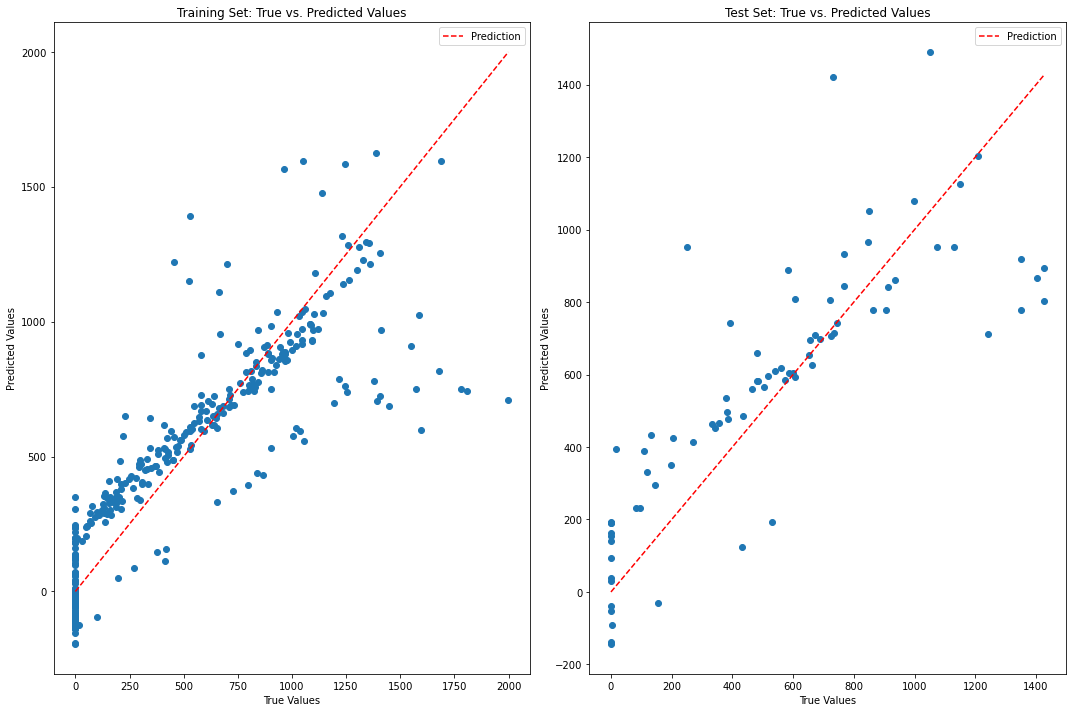

In [264]:
plt.figure(figsize = (15,10))

# Training set plot
plt.subplot(1, 2, 1)
plt.scatter(y_train, y_train_pred)
plt.plot([min(y_train), max(y_train)], [min(y_train), max(y_train)], '--', color='red', label='Prediction')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('Training Set: True vs. Predicted Values')
plt.legend()

# Test set plot
plt.subplot(1, 2, 2)
plt.scatter(y_test, y_test_pred)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], '--', color='red', label='Prediction')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('Test Set: True vs. Predicted Values')
plt.legend()

plt.tight_layout()
plt.show()

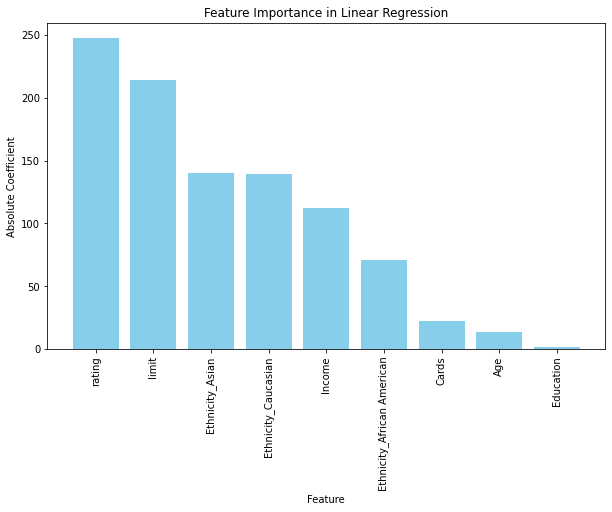

In [265]:
# Create a DataFrame to store feature names and corresponding coefficients
coefficients_df = pd.DataFrame({'Feature': X.columns, 'Coefficient': results.params[1:]})

# Sort the DataFrame by absolute values of coefficients in descending order
coefficients_df['Abs_Coefficient'] = np.abs(coefficients_df['Coefficient'])
coefficients_df = coefficients_df.sort_values('Abs_Coefficient', ascending=False)

# Plot feature importance using a bar chart
plt.figure(figsize=(10, 6))
plt.bar(coefficients_df['Feature'], coefficients_df['Abs_Coefficient'], color='skyblue')
plt.xlabel('Feature')
plt.ylabel('Absolute Coefficient')
plt.title('Feature Importance in Linear Regression')
plt.xticks(rotation=90)
plt.show()

### Checking for Linear Regression assumptions 
#### 1. Mean of residuals is nearly zero
This assumption states that the mean of the residuals (or errors) should be close to zero

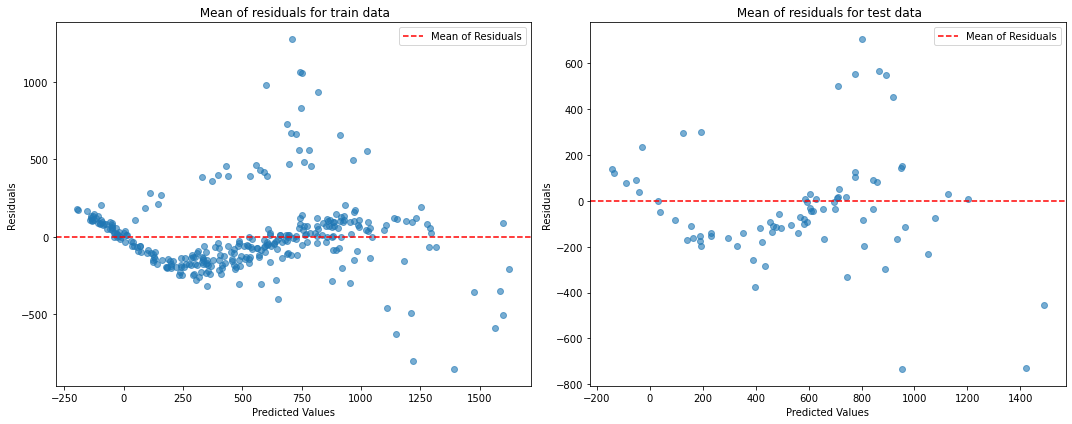

In [266]:
plt.figure(figsize=(15, 6))
# Traint set plot
plt.subplot(1, 2, 1)
plt.scatter(y_train_pred, residuals, alpha=0.6)
plt.axhline(y=0, color='red', linestyle='--', label='Mean of Residuals')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title(' Mean of residuals for train data')
plt.legend()

plt.subplot(1, 2, 2)
plt.scatter(y_test_pred, residuals_test, alpha=0.6)
plt.axhline(y=0, color='red', linestyle='--', label='Mean of Residuals')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title(' Mean of residuals for test data')
plt.legend()


plt.tight_layout()
plt.show()

#### Normality of residuals
This assumption states that the residuals should follow a normal distribution. In linear regression, it is assumed that the errors are normally distributed with a mean of zero and constant variance (homoscedasticity)

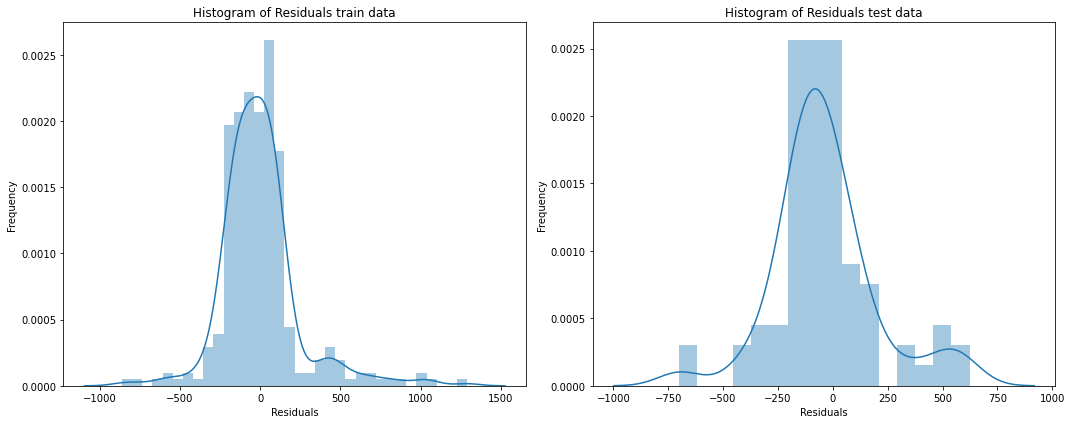

In [267]:
# Calculate the residuals
residuals = y_train - y_train_pred
residuals_test = y_test - y_test_pred

plt.figure(figsize=(15, 6))
plt.subplot(1, 2, 1)
sns.distplot(residuals)
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Histogram of Residuals train data')


# Test set plot
plt.subplot(1, 2, 2)
sns.distplot(residuals_test)
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Histogram of Residuals test data')


plt.tight_layout()
plt.show()

# Plot histogram of residuals


### Test for Muticolinearity

In [262]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Assuming you have a DataFrame `X` containing your predictor variables

vif_data = pd.DataFrame()
vif_data['Feature'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i)
                   for i in range(X.shape[1])]

print(vif_data)

                      Feature        VIF
0                       Cards   1.066872
1                         Age   1.039137
2                   Education   1.008460
3                      Income   1.655803
4                       limit  36.006385
5                      rating  35.685778
6  Ethnicity_African American  19.268841
7             Ethnicity_Asian  19.318023
8         Ethnicity_Caucasian  37.099296


<!-- ### VIF value look high for few features but there respective P-value are very low which signifies their importance in our model
Feature                      P-Value
limit                         0.007  
rating                        0.002      
Ethnicity_African American    0.000      
Ethnicity_Asian               0.000     
Ethnicity_Caucasian           0.000      -->

In [274]:
# There VIF value is high but P-Values are very very low which shows that these features are important
#     Feature                     VIF Value        P-Value
#     limit                       36.006385        0.007             
#     rating                      35.685778        0.002
#     Ethnicity_African American  19.268841        0.000 
#     Ethnicity_Asian             19.318023        0.000
#     Ethnicity_Caucasian         37.099296        0.000

In [275]:
# <!--  Comments on Model 
#  it has features with high multicolinearity but removing them was not increasing its performance
#  data was very less for training such model 
#  Mean of residuals is nearly zero doesnt hold nicly in this model  -->